<a href="https://colab.research.google.com/github/josephxlp/FinMLA/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Capital Asset Pricing Model (CAPM)

In [3]:
#import vizhelper
#import pfliohelpers
#import datahelper
from google.colab import drive
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
drive.mount('/content/drive', force_remount=True)
rootpath = Path("/content/drive/MyDrive/portfolio/FinMLA")
datapath = rootpath / 'data'
os.chdir(rootpath)

Mounted at /content/drive


In [5]:
df = pd.read_csv(datapath/"stock.csv", parse_dates=['Date'])
stocks_df = df.copy()
stocks_df.sort_values("Date",inplace=True)
nrows,ncol  = stocks_df.shape

In [6]:
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:

xcol ='Date'

In [ ]:
def estimate_porfolio_daily_returns(stocks_df, xcol='Date'):
    df_daily_return = stocks_df.copy()
    if  xcol in df_daily_return.columns:
        for i in df_daily_return.columns:
            if i != xcol:
                df_daily_return[i] = stocks_df[i].pct_change()
    #df_daily_return = df_daily_return.dropna()
    df_daily_return = df_daily_return.fillna(0)
    return df_daily_return


In [ ]:
stocks_daily_return = estimate_porfolio_daily_returns(stocks_df)

<Axes: xlabel='sp500', ylabel='AAPL'>

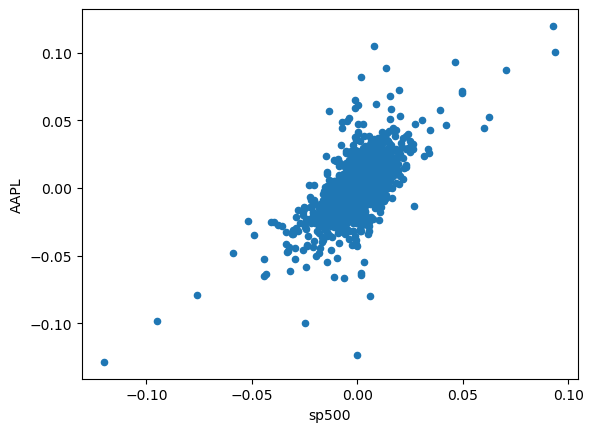

In [ ]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Beta and Its Interpretation

## Definition
Beta is a measure of the volatility or systematic risk of a security or portfolio in comparison to the market as a whole, typically represented by the S&P 500.

## Usage in CAPM
Beta is used in the Capital Asset Pricing Model (CAPM) to describe the relationship between systematic risk and expected return for assets.

## Interpretation
- **Beta = 1.0:**
  - The security's price activity is strongly correlated with the market.
  - Moves in line with the market.

- **Beta < 1:**
  - The security is theoretically less volatile than the market.
  - Example: Utility stocks often have betas less than 1, making them less risky and stabilizing a portfolio.

- **Beta > 1:**
  - The security's price is more volatile than the market.
  - Example: Tesla's beta of 1.26 indicates it is 26% more volatile than the market.
  - Tech stocks generally have higher betas, reflecting higher volatility and potential for excess returns.

## Example
- **MGM's Beta:**
  - If MGM has a beta of 1.65, it is 65% more volatile than the S&P 500.

# Understanding Alpha

#### Alpha as a Performance Measure
Alpha is a measure of an investment's performance on a risk-adjusted basis. It indicates how much better or worse an investment has performed compared to a benchmark index, after adjusting for the risk taken (as measured by beta).

#### Positive Alpha
- A positive alpha suggests that the investment has outperformed the market or benchmark index. This means that the investment has delivered returns that are higher than what would be expected based on its beta (systematic risk).
- In practical terms, a positive alpha indicates that the investment manager or strategy has added value beyond what could be attributed to market movements alone. It suggests skillful management or favorable conditions that have led to better-than-expected returns.

#### Negative Alpha
Conversely, a negative alpha would indicate underperformance relative to the benchmark, suggesting that the investment has not achieved returns commensurate with its risk level.

#### Example in Context
**AAPL's Positive Alpha:** If Apple (AAPL) has a positive alpha, it means that, after accounting for its volatility relative to the market (as measured by beta), it has delivered returns that exceed what would be expected based on its risk profile. This could be due to factors such as strong company performance, successful product launches, or effective management strategies.

#### Conclusion
A positive alpha is generally seen as a favorable indicator, suggesting that an investment is providing returns above the market average, adjusted for risk. It reflects the potential for additional gains that are not solely due to market movements, but rather due to the specific characteristics or management of the investment.

In [ ]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))

Beta for AAPL stock is = 1.11289241486781 and alpha is = 0.0005281208469440286


### Example Output
- **Beta for AAPL stock is = 1.1128924148678099**
  - This indicates that AAPL is approximately 11.3% more volatile than the S&P 500.
- **Alpha is = 0.052812084694402864**
  - This suggests that AAPL has an expected return of about 0.0528% independent of the market's movements.

Beta Calculation: The example uses np.polyfit to fit a linear regression line, where the slope (beta) indicates the stock's volatility relative to the market.

Alpha Calculation: The intercept (alpha) represents the stock's return independent of the market.

Understanding beta and alpha helps investors assess the risk and potential return of a stock relative to the market. AAPL's beta of 1.11 suggests it is slightly more volatile than the market, while its positive alpha indicates potential for returns beyond market movements

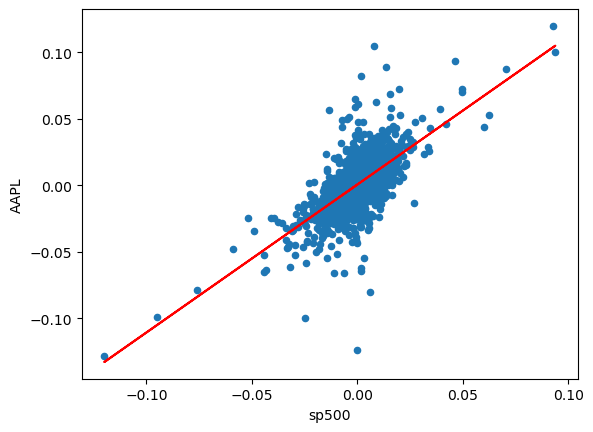

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


[sp-500-return-calculator](https://dqydj.com/sp-500-return-calculator/)

In [ ]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.0004931600660038915

In [ ]:
# Let's calculate the annualized rate of return for S&P500
rm = stocks_daily_return['sp500'].mean() * 252
rm

0.12427633663298064

In [ ]:
rf = 0

# Calculate return for any security (APPL) using CAPM
ER_AAPL = rf + ( beta * (rm-rf) )
ER_AAPL

0.1383061923864027

# Calculating Expected Return Using CAPM

## CAPM Formula

$ \text{ER}_{\text{AAPL}} = r_f + \beta \times (r_m - r_f) $

- **$ \text{ER}_{\text{AAPL}} $:** Represents the expected return of the security, in this case, Apple (AAPL).

- **$ r_f $:** The risk-free rate, which is the return on an investment with zero risk. This is often represented by the yield on government bonds, such as U.S. Treasury bills.

- **$ \beta $:** The beta of the security, which measures its volatility or systematic risk relative to the overall market. A beta greater than 1 indicates that the security is more volatile than the market, while a beta less than 1 indicates it is less volatile.

- **$ r_m $:** The expected return of the market. This is the average return expected from the market as a whole, often represented by a broad market index like the S&P 500.

- **$ r_m - r_f $:** The market risk premium, which is the additional return expected from holding a risky market portfolio instead of risk-free assets. It represents the reward for taking on additional risk.

## Interpretation

- **Expected Return Calculation:** The CAPM formula calculates the expected return of a security by adding the risk-free rate to the product of the security's beta and the market risk premium. This reflects the idea that investors need to be compensated for both the time value of money (via the risk-free rate) and the risk they take on (via the market risk premium).

- **Risk-Adjusted Return:** The expected return calculated using CAPM is a risk-adjusted return, meaning it accounts for the security's risk relative to the market. A higher beta increases the expected return, reflecting the higher risk.

- **Investment Decision-Making:** Investors use the expected return from CAPM to assess whether a security is fairly valued. If the actual return is higher than the expected return, the security might be undervalued, and vice versa.



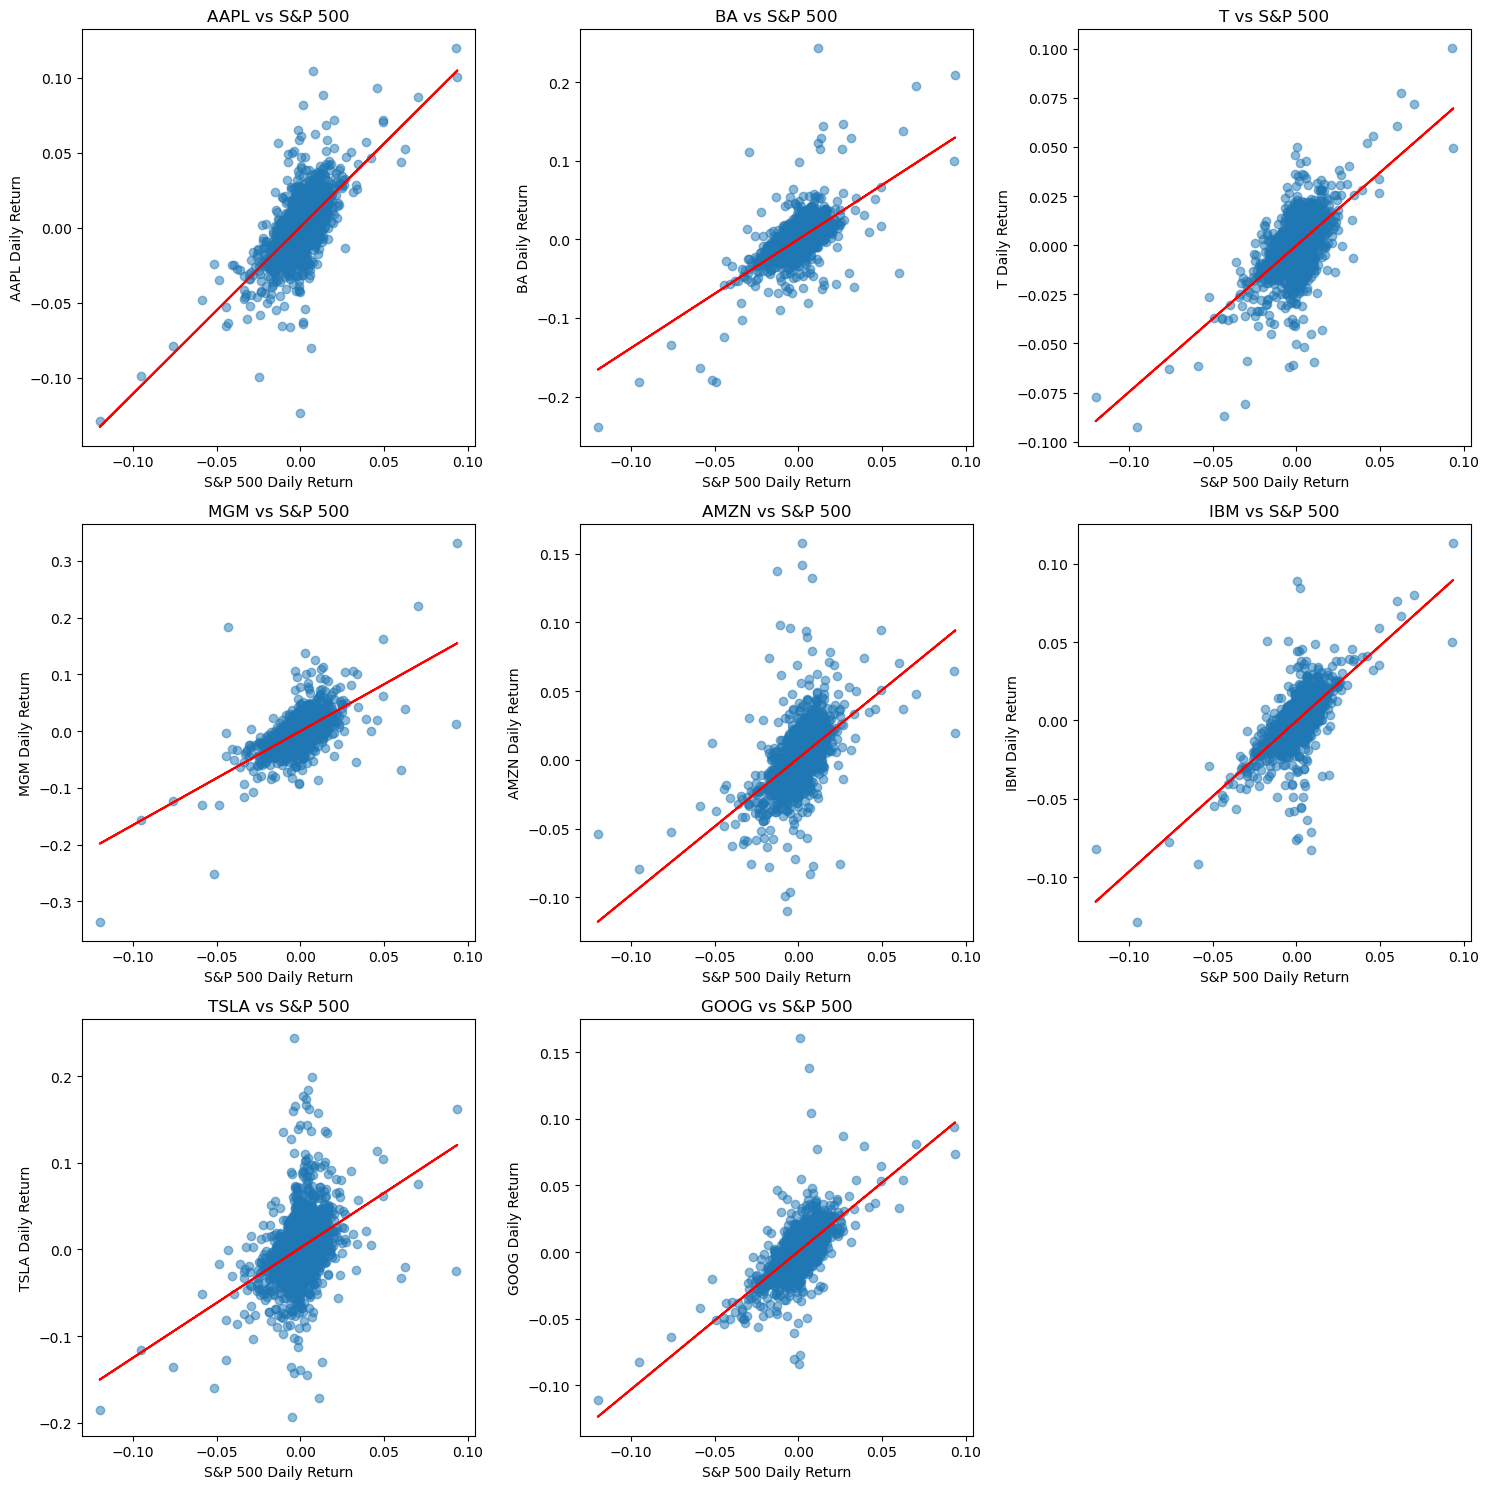

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming stocks_daily_return is your DataFrame with daily returns for stocks and the S&P 500
# Create placeholders for betas and alphas
beta = {}
alpha = {}

# Determine the number of plots
num_stocks = len(stocks_daily_return.columns) - 2  # Excluding 'Date' and 'sp500'
cols = 3  # Number of columns in the grid
rows = (num_stocks + cols - 1) // cols  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop over each stock's daily return
plot_index = 0
for i in stocks_daily_return.columns:
  if i != 'Date' and i != 'sp500':
      ax = axes[plot_index]

      # Plot a scatter plot between each individual stock and the S&P500 (Market)
      ax.scatter(stocks_daily_return['sp500'], stocks_daily_return[i], alpha=0.5)

      # Fit a polynomial (linear regression) between each stock and the S&P500
      b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

      # Plot the fitted line
      ax.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color='r')

      # Set plot title and labels
      ax.set_title(f'{i} vs S&P 500')
      ax.set_xlabel('S&P 500 Daily Return')
      ax.set_ylabel(f'{i} Daily Return')

      # Store the beta and alpha values
      beta[i] = b
      alpha[i] = a

      plot_index += 1

# Hide any unused subplots
for j in range(plot_index, len(axes)):
  fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
beta

{'AAPL': 1.11289241486781,
 'BA': 1.3828672010892782,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180119,
 'AMZN': 0.9917345712576846,
 'IBM': 0.9604149148095251,
 'TSLA': 1.2686150101095905,
 'GOOG': 1.0348817687428564}

In [ ]:
alpha

{'AAPL': 0.0005281208469440286,
 'BA': -2.2906983297531158e-05,
 'T': -0.0002856343019846159,
 'MGM': -0.00016885305520478568,
 'AMZN': 0.0010221396417765245,
 'IBM': -0.0005345494150445138,
 'TSLA': 0.0017583492165165896,
 'GOOG': 0.0003335558721467012}

APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [ ]:
# Obtain a list of all stock names
keys = list(beta.keys())
# Define the expected return dictionary
ER = {}
rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))


Expected Return Based on CAPM for AAPL is 0.1383061923864027%
Expected Return Based on CAPM for BA is 0.17185766980127887%
Expected Return Based on CAPM for T is 0.09253980720502036%
Expected Return Based on CAPM for MGM is 0.2054993369406582%
Expected Return Based on CAPM for AMZN is 0.12324913942818475%
Expected Return Based on CAPM for IBM is 0.11935684726020397%
Expected Return Based on CAPM for TSLA is 0.15765882605403161%
Expected Return Based on CAPM for GOOG is 0.12861131506762163%


# Understanding Expected Returns Using CAPM

## Overview
The Capital Asset Pricing Model (CAPM) is used to estimate the expected return of an investment based on its systematic risk, as measured by beta, relative to the market. In this analysis, the risk-free rate ($ r_f $) is assumed to be zero, and the expected market return ($ r_m $) is calculated from the average daily return of the S&P 500, annualized over 252 trading days.

## Results Interpretation
The expected returns for various stocks, calculated using CAPM, are as follows:

- **AAPL (Apple):** 0.1383%
- **BA (Boeing):** 0.1719%
- **T (AT&T):** 0.0925%
- **MGM (MGM Resorts):** 0.2055%
- **AMZN (Amazon):** 0.1232%
- **IBM (IBM):** 0.1194%
- **TSLA (Tesla):** 0.1577%
- **GOOG (Google):** 0.1286%

## What These Results Mean
- **Expected Return:** The expected return for each stock represents the return an investor might anticipate based on the stock's beta and the market's expected return. It reflects the compensation for taking on additional risk compared to a risk-free investment.
  
- **Beta's Role:** Stocks with higher betas are expected to have higher returns, as they are more volatile and thus riskier compared to the market. For example, MGM has a higher expected return, which aligns with its higher beta, indicating greater volatility.

- **Risk and Reward:** The CAPM framework suggests that investors should expect higher returns for taking on more risk. Stocks like TSLA and MGM, which are more volatile, have higher expected returns compared to more stable stocks like T (AT&T).

- **Investment Decisions:** These expected returns can help investors decide whether a stock is worth the risk based on its potential return. If the actual return of a stock is higher than the expected return, it might be undervalued, and vice versa.

## Conclusion
The CAPM provides a useful framework for understanding the relationship between risk and expected return. By comparing these expected returns with actual performance, investors can make more informed decisions about their portfolios.

In [ ]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8)
# Calculate the portfolio return
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 0.14213489176792526%

